###(21/06) MScFE 650 Machine Learning in Finance (C20-S3) Group 10 Submission #1

In [7]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import datetime
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.api as sm
import seaborn as sns
import pandas.testing as tm
from scipy import stats
from sklearn.decomposition import PCA

In [4]:
# Import data
data = pd.read_csv("/content/MScFE 650 MLF GWP Data.csv", index_col='Date')
#data['Date'] = pd.to_datetime(data['Date'], infer_datetime_format=True)
data.index = pd.to_datetime(data.index)

data.shape



(252, 35)

# 9 PCA Regression and Lasso Regression

##### 9.1 Run a regression of Y versus the PCA scores

In [9]:
data_pct_change_0 = data.pct_change()
pca = PCA(n_components=35)
data = data_pct_change_0.dropna(axis = 0)

pca.fit(data)
pca_0 = pd.DataFrame.from_records(pca.transform(data),index=data.index)
pca_0.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-08,0.369321,-0.037726,-0.016407,0.018396,0.040384,-0.012952,0.011559,-0.014948,0.003197,-0.005045,0.000951,0.002727,0.011523,0.018230,0.000279,-0.015501,0.041193,-0.003111,0.002233,-0.007550,-0.014127,0.016896,0.025695,0.009814,0.008456,0.005887,0.005539,-0.014867,-0.002648,0.002703,0.000976,-0.000806,0.005880,0.004914,0.001508
2016-01-15,0.212568,-0.021903,-0.025428,0.050743,-0.062720,-0.029594,-0.006575,0.028827,-0.046060,0.004031,0.001860,0.003450,0.004657,0.011784,0.012375,-0.000499,0.023028,0.021717,0.009450,-0.001702,-0.006450,0.011353,-0.020039,0.006865,0.000745,-0.004981,-0.005719,0.002807,-0.007057,-0.005249,-0.005343,0.009258,0.009435,-0.004454,-0.004746
2016-01-22,-0.063826,0.036424,-0.039530,0.013632,0.083716,-0.047541,0.009813,0.051999,0.013399,0.030909,0.024117,0.036830,0.021327,-0.000932,0.004119,0.010372,-0.009868,-0.009698,0.007376,0.017317,0.014080,-0.002382,0.008501,-0.005119,-0.021943,0.002136,0.023662,-0.018060,-0.002174,0.008110,-0.001606,-0.013157,-0.000866,-0.008456,-0.004252
2016-01-29,-0.223448,-0.102959,0.049807,-0.044507,0.056328,0.045265,-0.019009,0.028270,0.007687,-0.001007,0.005618,0.007263,-0.002392,-0.018728,-0.025950,0.026581,0.006204,0.036609,0.026609,-0.012387,0.003442,-0.019629,0.000138,0.014075,-0.003811,0.001771,0.000718,-0.013512,0.006501,-0.006339,-0.002805,-0.010479,0.003330,-0.007791,0.004435
2016-02-05,0.122193,-0.119120,0.050217,-0.021199,-0.010101,0.048079,0.013590,0.002898,-0.014781,-0.029250,-0.009075,-0.000110,-0.033912,0.014943,0.013154,0.033434,0.016659,-0.008981,-0.008955,0.038440,0.036908,0.019940,-0.010389,-0.017726,-0.026635,0.005024,-0.000612,-0.014220,0.003310,-0.006773,-0.001154,0.002939,0.003520,-0.000388,0.004200


In [10]:
Y = data['LUXXX']
X = pca_0

len(Y)
X.shape

(251, 35)

In [11]:
import statsmodels.api as sm

results = sm.OLS(Y,X).fit()
results.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  LUXXX   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          4.324e+04
Date:                Tue, 21 Sep 2021   Prob (F-statistic):                        0.00
Time:                        11:39:54   Log-Likelihood:                          1607.6
No. Observations:                 251   AIC:                                     -3145.
Df Residuals:                     216   BIC:                                     -3022.
Df Model:                          35                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0             -0.1894      0.000   -943.616      0.000      -0.190      -0.189
1              0.0794      0.000    159.560      0.000       0.078       0.080
2              0.0199      0.001     33.116      0.000       0.019       0.021
3              0.0362      0.001     45.391      0.000       0.035       0.038
4             -0.1537      0.001   -182.967      0.000      -0.155      -0.152
5              0.1445      0.001    151.190      0.000       0.143       0.146
6              0.4191      0.001    399.634      0.000       0.417       0.421
7              0.1244      0.001    112.748      0.000       0.122       0.127
8             -0.1317      0.001   -110.972      0.000      -0.134      -0.129
9             -0.2496      0.001   -199.551      0.000      -0.252      -0.247
10             0.6979      0.001    512.625      0.000       0.695       0.701
11            -0.1724      0.001   -119.467      0.000      -0.175      -0.170
12            -0.0920      0.002    -57.379      0.000      -0.095      -0.089
13            -0.0818      0.002    -50.307      0.000      -0.085      -0.079
14            -0.2035      0.002   -116.996      0.000      -0.207      -0.200
15            -0.0947      0.002    -53.420      0.000      -0.098      -0.091
16             0.2102      0.002    111.356      0.000       0.206       0.214
17             0.0180      0.002      9.152      0.000       0.014       0.022
18             0.0057      0.002      2.746      0.007       0.002       0.010
19            -0.0185      0.002     -8.325      0.000      -0.023      -0.014
20             0.0285      0.002     12.381      0.000       0.024       0.033
21            -0.0256      0.002    -10.569      0.000      -0.030      -0.021
22            -0.0178      0.003     -6.949      0.000      -0.023      -0.013
23             0.0233      0.003      8.330      0.000       0.018       0.029
24             0.0315      0.003     10.678      0.000       0.026       0.037
25            -0.0736      0.003    -23.438      0.000      -0.080      -0.067
26            -0.0314      0.003     -9.445      0.000      -0.038      -0.025
27             0.0422      0.004     11.876      0.000       0.035       0.049
28            -0.0377      0.004    -10.195      0.000      -0.045      -0.030
29            -0.0190      0.004     -4.894      0.000      -0.027      -0.011
30            -0.0096      0.004     -2.158      0.032      -0.018      -0.001
31             0.0052      0.005      0.973      0.332      -0.005       0.016
32            -0.0090      0.006     -1.603      0.110      -0.020       0.002
33             0.0017      0.009      0.191      0.849      -0.016       0.020
34            -0.0161      0.011     -1.491      0.137      -

# 10 Lasso Regression

##### 10.3 Split the data into testing and training, with 2/3 for training and 1/3 for testing


In [12]:
from sklearn.model_selection import train_test_split

Y = data['LUXXX']
X = data.drop(columns=['LUXXX'])


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=0)

len(Y)
X.shape
X_train.shape
X_test.shape

(83, 34)

#### 10.1 Run a linear regression of Y versus the other predictors

In [13]:
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error, explained_variance_score

reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)

y_train_pred = reg.predict(X_train)

print(f'Train R2 Score:{r2_score(y_train, y_train_pred)}')
print(f'Train Mean Squared Error:{mean_squared_error(y_train, y_train_pred)}')
print(f'Train Explained Variance:{explained_variance_score(y_train, y_train_pred)}')

Train R2 Score:0.680667366587656
Train Mean Squared Error:0.0004157909939328395
Train Explained Variance:0.680667366587656


In [14]:
y_test_pred = reg.predict(X_test)

print(f'Test R2 Score:{r2_score(y_test, y_test_pred)}')
print(f'Test Mean Squared Error:{mean_squared_error(y_test, y_test_pred)}')
print(f'Test Explained Variance:{explained_variance_score(y_test, y_test_pred)}')

Test R2 Score:0.3027965761281126
Test Mean Squared Error:0.0005276007051583429
Test Explained Variance:0.305475541380852


##### 10.2 For the lasso, use at least 1000 different values of the penalty parameter

In [15]:
penalty_list = []
penalty = 0.0273
penalty = 0.0001
counter=0
while counter<1000:
    penalty_list.append(penalty)
    penalty *= 1.001
    counter += 1
    
len(penalty_list)
penalty_list


[0.0001,
 0.0001001,
 0.00010020009999999998,
 0.00010030030009999997,
 0.00010040060040009996,
 0.00010050100100050005,
 0.00010060150200150054,
 0.00010070210350350203,
 0.00010080280560700552,
 0.0001009036084126125,
 0.0001010045120210251,
 0.00010110551653304611,
 0.00010120662204957914,
 0.00010130782867162871,
 0.00010140913650030033,
 0.00010151054563680062,
 0.00010161205618243741,
 0.00010171366823861983,
 0.00010181538190685843,
 0.00010191719728876527,
 0.00010201911448605403,
 0.00010212113360054008,
 0.0001022232547341406,
 0.00010232547798887472,
 0.00010242780346686358,
 0.00010253023127033044,
 0.00010263276150160075,
 0.00010273539426310235,
 0.00010283812965736544,
 0.0001029409677870228,
 0.00010304390875480982,
 0.00010314695266356462,
 0.00010325009961622816,
 0.00010335334971584438,
 0.0001034567030655602,
 0.00010356015976862576,
 0.00010366371992839437,
 0.00010376738364832274,
 0.00010387115103197105,
 0.00010397502218300301,
 0.00010407899720518601,
 0.000104

In [16]:
from sklearn import linear_model

mean_square_error_list = []

for penalty in penalty_list:
    reg = linear_model.Lasso(alpha=penalty,normalize=True)
    reg.fit(X_train,y_train)
    
    y_test_pred = reg.predict(X_test)
    mean_square_error = mean_squared_error(y_test, y_test_pred)
    mean_square_error_list.append(mean_square_error)

##### 10.4 Graph the overall model mismatch for each of the 1000 values of the paramter

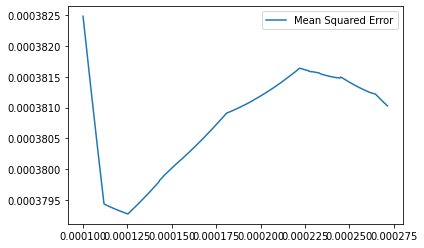

In [17]:
plt.plot(penalty_list, mean_square_error_list, label = "Mean Squared Error")
plt.legend()
plt.show()

##### 10.5 Find a lasso model that includes no more than 7 predictors

In [18]:
Min_Error = min(mean_square_error_list)
INDEX_for_min = mean_square_error_list.index(Min_Error)
Optimum_penalty = penalty_list[INDEX_for_min]
Optimum_penalty

0.00012521819316540811

In [19]:
reg = linear_model.Lasso(alpha=Optimum_penalty)
reg.fit(X_train,y_train)

Lasso(alpha=0.00012521819316540811, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [20]:
COEFF = reg.coef_.tolist()
COEFF_sorted = COEFF.copy()
COEFF_sorted.sort(reverse=True)

Top_7 = COEFF_sorted[0:7]

index_list = []
for i in Top_7:
    index_n = COEFF.index(i)
    index_list.append(index_n)
index_list

[3, 29, 7, 4, 12, 21, 25]

In [21]:
# reg.coef_
COLS = X_test.columns.to_list()
SELCTED_COLUMNS = []
for i in index_list:
    col = COLS[i]
    SELCTED_COLUMNS.append(col)

In [22]:
X_train_new = X_train[SELCTED_COLUMNS]
X_test_new = X_test[SELCTED_COLUMNS]

In [23]:
reg = linear_model.Lasso(alpha=Optimum_penalty)
reg.fit(X_train_new,y_train)

Lasso(alpha=0.00012521819316540811, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [24]:
y_test_pred = reg.predict(X_test_new)
mean_square_error = mean_squared_error(y_test, y_test_pred)
mean_square_error

0.00036497735843867